# Résultats d'entraînement
Courbes, matrice de confusion et rapport de classification.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
import json
from pathlib import Path

In [2]:
ROOT = Path.cwd().parent
model = tf.keras.models.load_model(ROOT / 'models' / 'dermai_cnn.h5')
CLASS_NAMES = ['nv', 'mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']

In [3]:
def plot_history(history, title=''):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    ax1.plot(history['accuracy'], label='Train')
    ax1.plot(history['val_accuracy'], label='Validation')
    ax1.set_title('Accuracy')
    ax1.legend()

    ax2.plot(history['loss'], label='Train')
    ax2.plot(history['val_loss'], label='Validation')
    ax2.set_title('Loss')
    ax2.legend()

    plt.suptitle(title)
    plt.show()

In [4]:
def plot_confusion_matrix(test_gen, model):
    y_pred = np.argmax(model.predict(test_gen), axis=1)
    y_true = test_gen.labels

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        xticklabels=CLASS_NAMES,
        yticklabels=CLASS_NAMES,
        cmap='Blues'
    )
    plt.title('Matrice de Confusion')
    plt.ylabel('Réel')
    plt.xlabel('Prédit')
    plt.show()

    print(classification_report(y_true, y_pred, target_names=CLASS_NAMES))

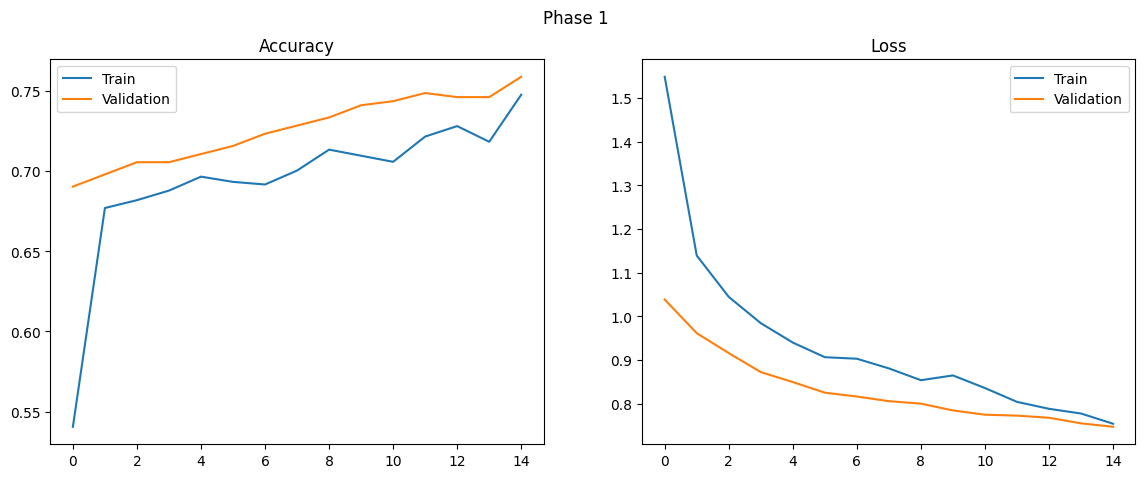

In [5]:
history_file = ROOT / 'models' / 'training_history_phase1.json'
if history_file.exists():
    with open(history_file, 'r', encoding='utf-8') as f:
        history = json.load(f)
    plot_history(history, title='Phase 1')
else:
    print('Fichier history non trouvé. Lance train.py pour le générer.')